In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
dao = pd.read_csv("/Users/hakanzip/Desktop/Karışık_Projeler/dao_whale/data/reputationHolders.csv")

In [3]:
dao.head()

,Unnamed: 0,network,id,address,balance,contract,createdAt,dao
0,0,mainnet,0x0003a06b89cb93c8f3c630c0c26f64b13e1c844ee224...,0xbe5cf9a0408d22cdd61f8990b33dd00a5272f65b,30000000000000000000,0xed1c0bb038b370a16242f077899ee1e5e7d6add1,1561039862,0x6bee9b81e434f7afce72a43a4016719315069539
1,1,mainnet,0x001688e16afd026c2f4f943a0c0e20a07591e6b0be45...,0xe0d6480ae69e7c4928a3f45e6cf5651e52741ec0,50000000000000000000,0x4352a94ccb3ea07e16734f66a94e94e474a50b5f,1606849279,0x273d0f686a53a49a0fba2a801566b19f9aaf8fcd
2,2,mainnet,0x0018946eee358a93d9b8a681344621950128ae20357c...,0xbf4e9e59b1ac3a1d0df596ce68841ee7c5008388,10000000000000000000,0xed1c0bb038b370a16242f077899ee1e5e7d6add1,1561035755,0x6bee9b81e434f7afce72a43a4016719315069539
3,3,mainnet,0x001d02d26aa50572b3c67e6c60a1ca7b60e1168aa6be...,0xddf2bb10b39bbc89746c8b81e7d08922fbbcc9aa,50000000000000000000,0xed1c0bb038b370a16242f077899ee1e5e7d6add1,1561034537,0x6bee9b81e434f7afce72a43a4016719315069539
4,4,mainnet,0x0030fa6c205655268a0ccd7587c22c2b0df971bea864...,0x705dc139f523c0056d0a7e3b80799ddaf0b8b640,10000000000000000000,0xed1c0bb038b370a16242f077899ee1e5e7d6add1,1561035535,0x6bee9b81e434f7afce72a43a4016719315069539


Unnamed gördüğüm yerde elim titriyor silmek için

In [4]:
dao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9503 entries, 0 to 9502
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9503 non-null   int64 
 1   network     9503 non-null   object
 2   id          9503 non-null   object
 3   address     9503 non-null   object
 4   balance     9503 non-null   object
 5   contract    9503 non-null   object
 6   createdAt   9503 non-null   int64 
 7   dao         9503 non-null   object
dtypes: int64(2), object(6)
memory usage: 594.1+ KB


"balance     9503 non-null   object" bu nasıl olur, böyle bir şey olamaz. Nayır. Nayır. Kesinlikle sayısal yapılmalı.

In [5]:
dao.isnull().sum()

Unnamed: 0    0
network       0
id            0
address       0
balance       0
contract      0
createdAt     0
dao           0
dtype: int64

In [6]:
dao.describe()

,Unnamed: 0,createdAt
count,9503.000000,9.503000e+03
mean,4751.000000,1.570965e+09
std,2743.424138,1.511881e+07
min,0.000000,1.554713e+09
25%,2375.500000,1.561035e+09
50%,4751.000000,1.561047e+09
75%,7126.500000,1.581199e+09
max,9502.000000,1.699683e+09


In [7]:
dao.nunique()

Unnamed: 0    9503
network          2
id            9503
address       9016
balance       1328
contract        57
createdAt      937
dao             57
dtype: int64

In [8]:
dao.drop(columns=["Unnamed: 0"], inplace=True)

Titremem geçti

In [9]:
dao["balance"] = dao["balance"].astype(float)

In [10]:
dao["reputation_group"] = pd.qcut(dao["balance"], q=3, labels=["low", "mid", "whale"])

Feature engineering kısmındayız. Burası kilit nokta çünkü balina bilgisini reputation'dan çıkaracağız bismillah.

In [11]:
dao_group_counts = dao.groupby(["dao", "reputation_group"]).size().unstack(fill_value=0)

Her Dao için reputation_group dağılımını gösteren sütun

In [12]:
dao_group_counts["total_members"] = dao_group_counts.sum(axis=1)

Her Dao'daki toplam kullanıcı sayısını gösteren sütun yaratımı

In [13]:
dao_group_counts["whale_ratio"] = dao_group_counts["whale"] / dao_group_counts["total_members"]

Burada yeni oluşturduğumuz yeni sütun ile yeni bir sütun oluşturduk. Proje değil inception filmi mübarek. Yeni sütun Dao balina oranı.

In [14]:
dao_group_counts.head()

reputation_group,low,mid,whale,total_members,whale_ratio
dao,,,,,
0x0b93ba560283350d4216f29dc57e15df38d0eace,0,0,55,55,1.0
0x14b0b26210c685ec89bb847d5effed1098a2dc52,0,0,1,1,1.0
0x15344ecdc2c4edfcb092e284d93c20f0529fd8a6,0,0,29,29,1.0
0x15c73b5bb21d6d2852dab17cef9b5ec84eaa4cc0,0,0,1,1,1.0
0x1ea9426f006a6f335f753ccc4ee1d11bbd67b53f,0,0,3,3,1.0


In [15]:
dao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9503 entries, 0 to 9502
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   network           9503 non-null   object  
 1   id                9503 non-null   object  
 2   address           9503 non-null   object  
 3   balance           9503 non-null   float64 
 4   contract          9503 non-null   object  
 5   createdAt         9503 non-null   int64   
 6   dao               9503 non-null   object  
 7   reputation_group  9503 non-null   category
dtypes: category(1), float64(1), int64(1), object(5)
memory usage: 529.2+ KB


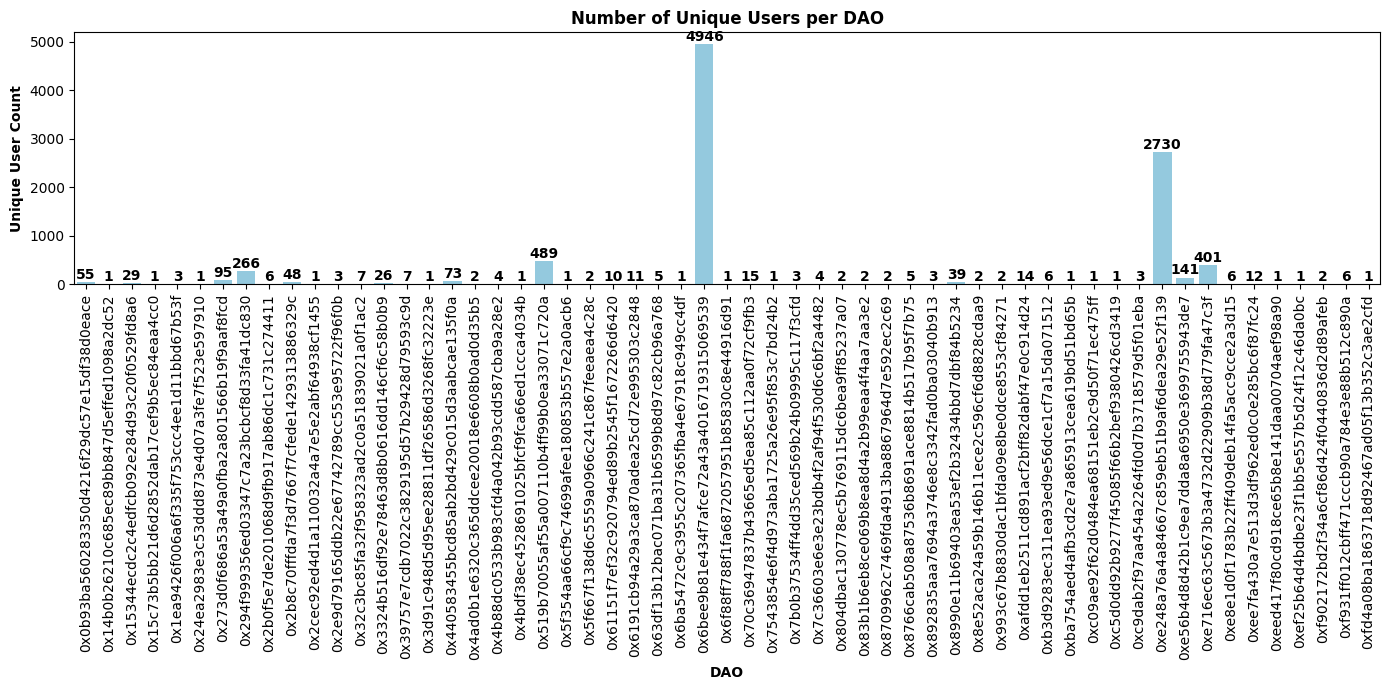

In [16]:
dao_member_counts = dao.groupby("dao")["address"].nunique()
avg_users_per_dao = dao_member_counts.mean()

plt.figure(figsize=(14, 7))
sns.barplot(x=dao_member_counts.index, y=dao_member_counts.values, color="skyblue")
plt.xticks(rotation=90)
plt.title("Number of Unique Users per DAO", fontweight='bold')
plt.xlabel("DAO", fontweight='bold')
plt.ylabel("Unique User Count", fontweight='bold')


for i, val in enumerate(dao_member_counts.values):
    plt.text(i, val + 1, str(val), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

Bu grafikte her bir DAO'ya ait benzersiz kullanıcı sayısı görselleştirilmiştir. Çoğu DAO düşük sayıda kullanıcıya sahipken, birkaç DAO çok yüksek kullanıcı sayısıyla öne çıkmaktadır. Özellikle belirli DAO'lar, yüzlerce hatta binlerce kullanıcı barındırarak sistemdeki ağırlıklarını açıkça göstermektedir. Bu durum, DAO ekosistemindeki dağılımın oldukça dengesiz olduğunu, bazı DAO'ların kullanıcı tabanı açısından çok baskın olduğunu göstermektedir. Bu da potansiyel olarak oylamalarda veya karar süreçlerinde bu DAO'ların daha etkili olabileceğini düşündürmektedir.

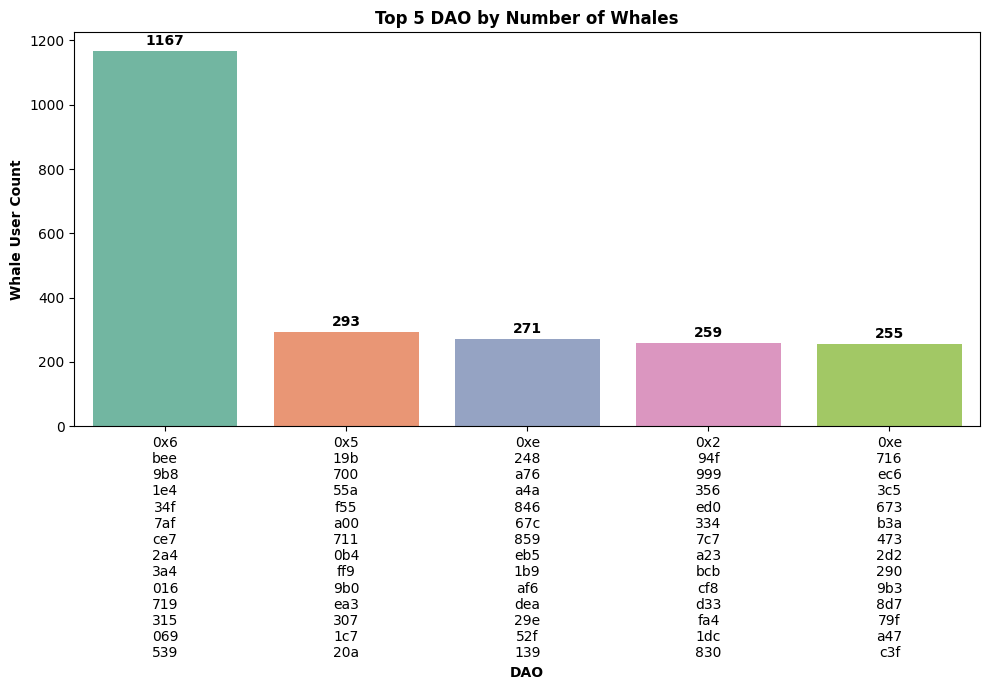

In [17]:
top5_whale_counts = dao[dao["reputation_group"] == "whale"]["dao"].value_counts().head(5)
formatted_labels = ['\n'.join([dao[i:i+3] for i in range(0, len(dao), 3)]) for dao in top5_whale_counts.index]

plt.figure(figsize=(10, 7))
sns.barplot(x=formatted_labels, y=top5_whale_counts.values, palette='Set2')
for i, val in enumerate(top5_whale_counts.values):
    plt.text(i, val + 10, str(val), ha='center', va='bottom', fontweight='bold')

plt.title("Top 5 DAO by Number of Whales", fontweight='bold')
plt.xlabel("DAO", fontweight='bold')
plt.ylabel("Whale User Count", fontweight='bold')
plt.tight_layout()
plt.show()


Dao isimlerini değişkenlere atasaydık keşke sığmadılar. Grafikte en çok whale barındıran 5 DAO var. Birinci DAO’daki whale sayısı diğerlerine göre çok daha fazla. Diğer dört DAO ise neredeyse eşit seviyede. Yani büyük balıklar tek bir yerde toplanmış.

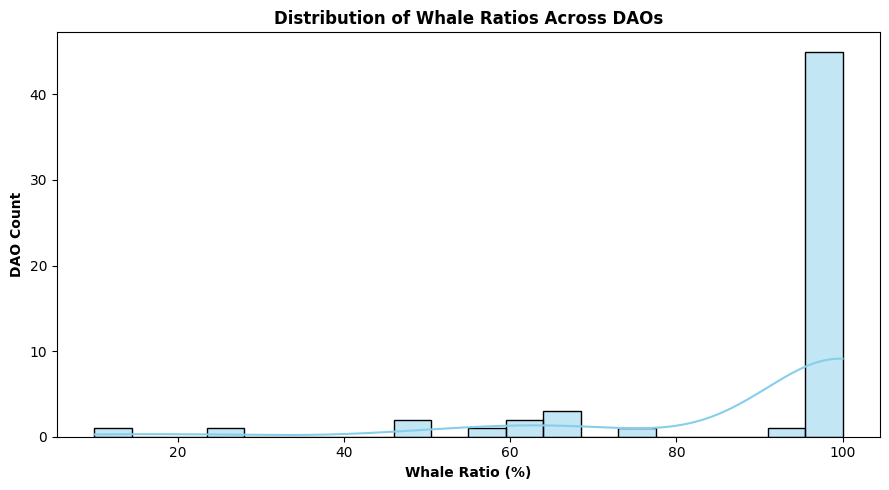

In [18]:
whale_ratio_per_dao = dao.groupby("dao")["reputation_group"].apply(lambda x: (x == "whale").sum() / len(x) * 100)
plt.figure(figsize=(9, 5))
sns.histplot(whale_ratio_per_dao, bins=20, kde=True, color="skyblue", edgecolor="black")

plt.title("Distribution of Whale Ratios Across DAOs", fontweight="bold")
plt.xlabel("Whale Ratio (%)", fontweight="bold")
plt.ylabel("DAO Count", fontweight="bold")
plt.tight_layout()
plt.show()

Whale oranı çoğu DAO'da %90’ın üzerinde. Yani katılımcıların büyük kısmı zaten whale. Bu da sistemin oldukça dengesiz olduğunu gösteriyor. Yanlış metriği mi seçtik naptık nerede yanlış yaptık kimin tavuğuna kış dedik :(

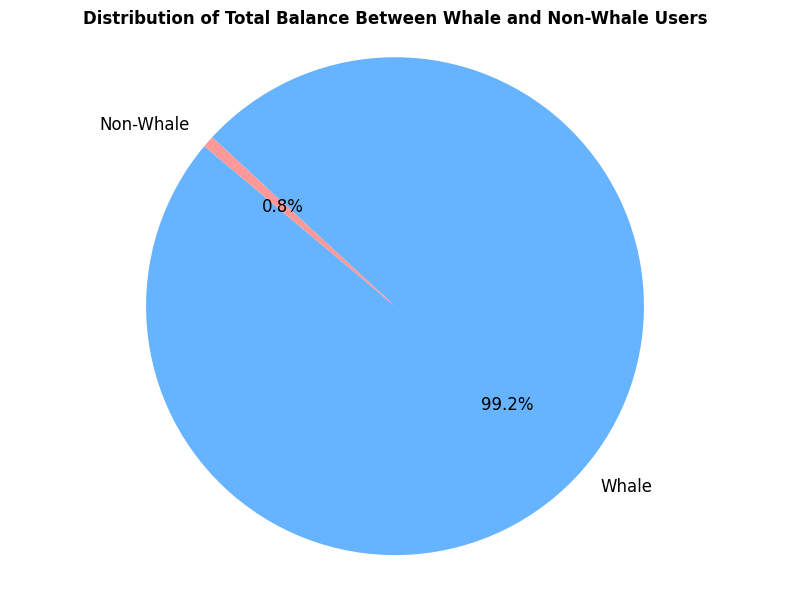

In [19]:
whale_balance = dao[dao["reputation_group"] == "whale"]["balance"].sum()
non_whale_balance = dao[dao["reputation_group"] != "whale"]["balance"].sum()
labels = ['Whale', 'Non-Whale']
sizes = [whale_balance, non_whale_balance]
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
plt.axis('equal')
plt.title('Distribution of Total Balance Between Whale and Non-Whale Users', fontweight='bold')
plt.tight_layout()
plt.show()

Pastanın süsü oldu bu da :D görev başarısız asker üsse dön

Bu çalışmada DAO'lardaki whale oranlarını inceledik. Her DAO’da kaç kişi olduğunu ve bunlardan kaçının whale olduğunu hesapladık. Formül doğruydu. Whale sayısını toplam kullanıcıya böldük. Ama sonuçlar çok yüksekti. Bazı DAO’larda oran %90’ın üstündeydi. Bu işlemlerin içinden geçti. Aslında teknik bir hata yapmadık. Ama metrik eksik kaldı. Çünkü sadece sayı üzerinden hesap yaptık. Whale olan kişilerin gerçekten ne kadar varlığı olduğunu düşünmedik. Belki 50 kişi whale ama toplamda küçük bir balance tutuyorlar. Biz buna bakmadık O yüzden oranlar abartılı çıktı.
Bu da analizimizin zayıf görünmesine neden oldu. Metrik doğru gibi dursa da gerçeği tam yansıtmadı. Aslında veri setinde bir sürü dosya vardı biz bununla işimizi haleederiz demiştim. Ummadık taş baş yararmış oğlum Mernuş.